<a href="https://colab.research.google.com/github/AvantiShri/cee162f/blob/master/CEE162F_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the cells below, I will define various utility functions needed for answering the problems set questions, such as the dispersion relation

In [0]:
import numpy as np
import scipy.optimize

def dispersion_relation(omega, depth):
    #Gravity (in m/s^2)
    GRAVITY = 9.81;
    #Initial guess is the deep water relation
    k0 = (omega**2)/GRAVITY;
    if (depth==None):
        return k0
    else:
        def func_to_solve(x):
            return omega**2 - GRAVITY*x*np.tanh(x*depth)
        def fprime(x):
            return -GRAVITY*np.tanh(x*depth)-GRAVITY*x*(1-(np.tanh(x*depth)**2))
         
    return scipy.optimize.fsolve(func=func_to_solve,
                                 x0=k0,
                                 fprime=fprime)
  
def wavelength_given_period(period, depth):
    omega = 2*np.pi/period
    wavenumber = dispersion_relation(omega=omega,
                                     depth=depth)
    wavelength = 2*np.pi/wavenumber
    return wavelength

Problem 1: A storm off the coast of Alaska generates waves that make it to Ocean Beach, San Francisco, roughly 5000 km away, that have a height of H=1 m and with periods ranging from a minimum of 5s to a maximum of 20 s.

(a) What is the wavelength ofthe waves, to the nearest meter?(Answer for waves with the minimum and maximum period, for this question and for b.-e. below).

In [10]:
#We find the minimum and maximum wavelength from the dispersion relation
minimum_period = 5
maximum_period = 20
minimum_wavelength = int(np.round(wavelength_given_period(period=minimum_period, depth=None)))
maximum_wavelength = int(np.round(wavelength_given_period(period=maximum_period, depth=None)))
print("Minimum period in meters:", minimum_wavelength)
print("Maximum period in meters:", maximum_wavelength)

Minimum period in meters: 39
Maximum period in meters: 625


(b) Approximately how long does it take for the waves to propagate from where they were generated to Ocean Beach, to the nearest 0.1day?

In [12]:
#We know that longer period waves propagate faster.
#The slowest waves will be the ones with the smallest period and wavelength
slowest_wavespeed = minimum_wavelength/minimum_period
fastest_wavespeed = maximum_wavelength/maximum_period
slowest_time_in_days = (5000000/slowest_wavespeed)/(3600*24)
fastest_time_in_days = (5000000/fastest_wavespeed)/(3600*24)
print("For the slowest waves, time in days:",np.round(slowest_time_in_days,1))
print("For the fastest waves, time in days:",np.round(fastest_time_in_days,1))

For the slowest waves, time in days: 7.4
For the fastest waves, time in days: 1.9


(c) At what depth, to the nearest meter, will the waves begin to “feel” the bottom (i.e. thedepth at which the waves are nolonger considered deep water waves)?

In [15]:
#The criterion for deep water waves is d > L/2
# therefore, we solve for d = L/2
shallowest_depth = minimum_wavelength/2
deepest_depth = maximum_wavelength/2
print("For the shortest period (shortest wavelength) waves, they will feel the bottom at a depth in m of",int(np.round(shallowest_depth)))
print("For the longest period (longest wavelength) waves, they will feel the bottom at a depth in m of",int(np.round(deepest_depth)))

For the shortest period (shortest wavelength) waves, they will feel the bottom at a depth in m of 20
For the longest period (longest wavelength) waves, they will feel the bottom at a depth in m of 312


(d) What are the maximum bottom currents due to the waves in water that is 10m deep? Assume the frequencyand height do not change as the waves shoal.

In [16]:
#I assume "maximum bottom currents" refers to the horizontal component of the orbital velocity.
#Using the formula u = pi*H/T cosh(k(z+d))/sinh(kd) cos(kx - omega*t)
#At the bottom, z = -d, so this becomes:
# u = pi*H/T cosh(0)/sinh(kd) cos(kx - omega*t)
#cosh(0) = 1, so this becomes:
# u = pi*H/T 1/sinh(kd) cos(kx - omega*t)
#The maximum value of cos(kx - omega*t) is 1, so this becomes:
# u = pi*H/T 1/sinh(kd)
#We had H = 1m and d=10m.

shortestperiod_wavenumber = 2*np.pi/minimum_wavelength
longestperiod_wavenumber = 2*np.pi/maximum_wavelength

shortest_period_current = (np.pi*1/(minimum_period))*(1/np.sinh(shortestperiod_wavenumber*10))
longest_period_current = (np.pi*1/(maximum_period))*(1/np.sinh(longestperiod_wavenumber*10))
print("Currents due to the waves with the shortest period in m/s", shortest_period_current)
print("Currents due to the waves with the longest period in m/s", longest_period_current)

Currents due to the waves with the shortest period in m/s 0.2613360777876058
Currents due to the waves with the longest period in m/s 1.5598712054266775


(e) Sketch the orbitals for each waveat a depth of 1 m below the water surface, when the water depth is 10m (same as part d).Indicate the velocity vectors (u, w) and accelerations (du/dt and dw/dt) at wt=0, p/2, p, 3p/2.You do notneed to calculate the magnitudes –just indicate the directions.

![wave orbitals](https://drive.google.com/uc?export=view&id=1OCcxjLVevoK29Tl8ZiPSeIaJHcbbwI76)

(2) The 2011 tsunami generated off the coast of Japancaused some damage on the US west coast, especially in Crescent Cityin Northern California, where aharbor was destroyed.Assuming a constant depth of 3600 m in the Pacific Ocean, what is the fastest possible wave speed for thetsunamiin this depth, and how long didthis tsunamitake to travel the 8600km across the Pacific to get to California, to the nearest 0.1 hr? 

In [19]:
#The fastest wave speed is given by assuming the longwave (shallow water) criterion, i.e. kd << 1. 
# This is sqrt(gd)
longwave_speed = np.sqrt(9.81*3600)
print("Fastest (longwave) speed:",longwave_speed)
print("Time taken in hrs",np.round((8600000/longwave_speed)/3600,1))

Fastest (longwave) speed: 187.92551716038992
Time taken in hrs 12.7


(3) Suppose you have a pressure sensor that can measure a minimum pressure perturbationof 10 Pa.  What is the minimum period T ofa wave with a height of H=1 m that this pressure sensor can measure at the bottom in water of depth d=10 m?

In [24]:
#Pressure response factor = Kp = cosh(k(z+d))/cosh(kd)
# At the bottom, z=-d and Kp = 1/cosh(kd)
#The pressure at the bottom is rho*g*(depth*Kp*eta)
#The maximum value of eta is H/2 = 0.5m
#Solving for 10Pa, we have 10Pa = rho*g*(10*0.5*(1/cosh(kd)))
#The density of water is about 1000kg/m3
#This gives cosh(kd) = (1000*9.81)/(10)

def get_period_from_depth(depth):
  kd = np.arccosh((1000*9.81)/(10))
  k = kd/depth
  omega = np.sqrt((9.81)*k*np.tanh(kd))
  period = 2*np.pi/omega
  return period

depth=10 #depth is 10m
print("The minimum period in seconds is", get_period_from_depth(depth))

The minimum period in seconds is 2.3038893887806005


Use Matlab to plot the period as a function of depthd. Why does the period increase with increasing depth?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


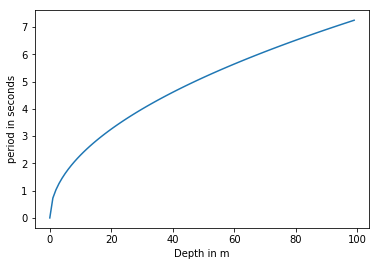

In [29]:
#The period increase with depth because longer period waves have
# more power, and the deeper the bottom, the more power the
# wave must have to be felt at the bottom

depths = np.arange(100)
periods = [get_period_from_depth(x) for x in depths]
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(depths, periods)
plt.xlabel("Depth in m")
plt.ylabel("period in seconds")
plt.show()